In [1]:
# Import Library Dependencies
import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

# Import Custom API Functions
from apidata import quandl_stock_data

In [2]:
# Portfolio Stock Selection
pfolio_assets = ["F", "GOOG", "TSLA"]
print(f'Number of Portfolio Assets: {len(pfolio_assets)}')

Number of Portfolio Assets: 3


In [3]:
# Initializing DataFrame
portfolio = quandl_stock_data(pfolio_assets[0], verbose=True) \
            .rename(columns={"Close": pfolio_assets[0].upper()})[pfolio_assets[0].upper()] \
            .reset_index()


[Quandl] Query API Summary:

--------------------------------------------------------------------------- 

- symbol: F
- start_date: 2014-01-01
- end_date: 2019-01-01
- collapse: monthly
- data_type: pandas

 --------------------------------------------------------------------------- 


[Preview] Response DataFrame


              Open   High    Low  Close      Volume
Date                                              
2014-01-02  15.42  15.45  15.28  15.44  31528500.0
2014-01-03  15.52  15.64  15.30  15.51  46122300.0
2014-01-06  15.72  15.76  15.52  15.58  42657600.0
2014-01-07  15.73  15.74  15.35  15.38  54476300.0
2014-01-08  15.60  15.71  15.51  15.54  48448300.0
2014-01-09  15.83  16.02  15.77  15.84  67836500.0
2014-01-10  16.01  16.11  15.94  16.07  44984000.0
2014-01-13  16.37  16.53  16.08  16.11  57566400.0
2014-01-14  16.31  16.43  16.17  16.40  44039200.0
2014-01-15  16.37  16.73  16.35  16.70  64118200.0 

-----------------------------------------------------------------

In [4]:
# Generate Portfolio DataFrame:
# [1] Query Stock Return Data - Quandl API Call
# [2] Merge Stock Returns into Portfolio DataFrame 

for i, stock in enumerate(pfolio_assets[1:]):
    print(f"<Quandl API Call> [{i+1}] Stock Symbol: {stock}")
    add_stock = quandl_stock_data(stock) \
                .rename(columns={"Close": stock})[stock] \
                .reset_index()
    
    portfolio = pd.merge(portfolio, add_stock, on="Date", how="inner")
    
print (f"\nAsset Returns: Merged // Portfolio DataFrame: <Complete>")

<Quandl API Call> [1] Stock Symbol: GOOG
<Quandl API Call> [2] Stock Symbol: TSLA

Asset Returns: Merged // Portfolio DataFrame: <Complete>


In [5]:
# Set DataFrame Index (Date)
portfolio.set_index("Date", inplace=True)
portfolio.head(15)

,F,GOOG,TSLA
Date,,,
2014-03-27,15.25,558.46,207.320
2014-03-28,15.45,559.99,212.370
2014-03-31,15.60,556.97,208.450
2014-04-01,16.32,567.16,216.970
2014-04-02,16.46,567.00,230.290
2014-04-03,16.39,569.74,225.400
2014-04-04,16.13,543.14,212.225
2014-04-07,15.94,538.15,207.520
2014-04-08,16.10,554.90,215.460


In [6]:
# View DataFrame -- Data Completeness
portfolio.count()

F       1007
GOOG    1007
TSLA    1007
dtype: int64

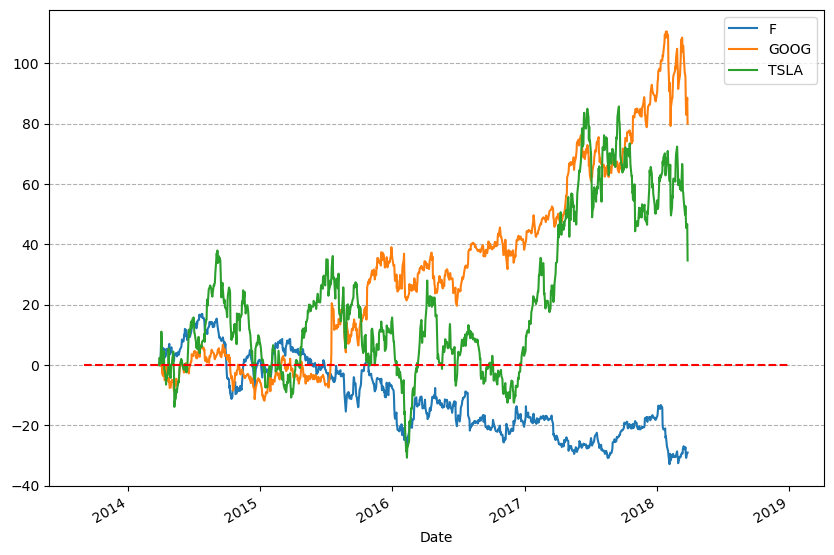

In [7]:
# [Visualize] Plot Data Frame -- Closing Prices
visual_plot = ((portfolio/portfolio.iloc[0] * 100) - 100).plot(figsize=(10,7))
plt.grid(axis="y", linestyle="dashed")
plt.hlines(0, "2013-09-01", "2019-01-01", linestyle="dashed", color="red")

In [8]:
# Convert Stock Price Data into Log Returns -- Removed Offset Row
log_returns = np.log(portfolio / portfolio.shift(1)).iloc[1:]
log_returns[:15]

,F,GOOG,TSLA
Date,,,
2014-03-28,0.013030,0.002736,0.024067
2014-03-31,0.009662,-0.005408,-0.018631
2014-04-01,0.045120,0.018130,0.040060
2014-04-02,0.008542,-0.000282,0.059580
2014-04-03,-0.004262,0.004821,-0.021463
2014-04-04,-0.015991,-0.047813,-0.060230
2014-04-07,-0.011849,-0.009230,-0.022419
2014-04-08,0.009988,0.030651,0.037548
2014-04-09,-0.016281,0.016515,0.006799


In [9]:
# Calculate Average Annual Log Returns 
log_returns.mean()*250

F      -0.085055
GOOG    0.146039
TSLA    0.073955
dtype: float64

In [10]:
# Portfolio Asset Covariance Matrix
log_returns.cov() * 250

,F,GOOG,TSLA
F,0.052101,0.016789,0.023396
GOOG,0.016789,0.050494,0.029402
TSLA,0.023396,0.029402,0.152522


In [11]:
# Portfolio Asset Correlation Matrix
log_returns.corr()

,F,GOOG,TSLA
F,1.000000,0.327321,0.262458
GOOG,0.327321,1.000000,0.335037
TSLA,0.262458,0.335037,1.000000


In [12]:
# Count Number of Assets in Portfolio
num_assets = (len(pfolio_assets) )
num_assets

3

In [13]:
# Simulate 10k Random Portfolios
pfolio_sims = []
pfolio = {}

mkt_return = .098
sim_trials = 2500
for i in range(sim_trials):
    weights = np.random.random(num_assets)
    weights /= np.sum(weights)
    
    WTSp = zip(pfolio_assets, weights)
    RTNp = np.sum(weights * log_returns.mean()) * 250
    VOLp = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 250, weights)))
    
    pfolio = {a:round(wt, 4) for a,wt in WTSp}
    pfolio["RTN"] = round(RTNp, 4)
    pfolio["VOL"] = round(VOLp, 4)
    pfolio["Sharpe"] = round((RTNp - mkt_return)/VOLp, 4)
    pfolio_sims.append(pfolio)
    
    print("\n",pfolio, "\n")

print(">>> Data Points Generated -- Simulation Complete <<<")


 {'F': 0.5336, 'GOOG': 0.1239, 'TSLA': 0.3425, 'RTN': -0.002, 'VOL': 0.2163, 'Sharpe': -0.4622} 


 {'F': 0.2545, 'GOOG': 0.3388, 'TSLA': 0.4066, 'RTN': 0.0579, 'VOL': 0.2241, 'Sharpe': -0.1789} 


 {'F': 0.3746, 'GOOG': 0.4004, 'TSLA': 0.2249, 'RTN': 0.0432, 'VOL': 0.1934, 'Sharpe': -0.2831} 


 {'F': 0.519, 'GOOG': 0.047, 'TSLA': 0.4339, 'RTN': -0.0052, 'VOL': 0.2354, 'Sharpe': -0.4383} 


 {'F': 0.3561, 'GOOG': 0.2205, 'TSLA': 0.4234, 'RTN': 0.0332, 'VOL': 0.2271, 'Sharpe': -0.2852} 


 {'F': 0.7834, 'GOOG': 0.1155, 'TSLA': 0.1011, 'RTN': -0.0423, 'VOL': 0.2041, 'Sharpe': -0.6875} 


 {'F': 0.4598, 'GOOG': 0.3789, 'TSLA': 0.1613, 'RTN': 0.0282, 'VOL': 0.1875, 'Sharpe': -0.3725} 


 {'F': 0.1774, 'GOOG': 0.3014, 'TSLA': 0.5212, 'RTN': 0.0675, 'VOL': 0.251, 'Sharpe': -0.1216} 


 {'F': 0.4096, 'GOOG': 0.3493, 'TSLA': 0.2411, 'RTN': 0.034, 'VOL': 0.1953, 'Sharpe': -0.3277} 


 {'F': 0.2381, 'GOOG': 0.2749, 'TSLA': 0.487, 'RTN': 0.0559, 'VOL': 0.2417, 'Sharpe': -0.1741} 


 {'F': 0.396

In [14]:
# Convert to DataFrame
portfolios = pd.DataFrame(pfolio_sims)
portfolios.head()

,F,GOOG,TSLA,RTN,VOL,Sharpe
0,0.5336,0.1239,0.3425,-0.0020,0.2163,-0.4622
1,0.2545,0.3388,0.4066,0.0579,0.2241,-0.1789
2,0.3746,0.4004,0.2249,0.0432,0.1934,-0.2831
3,0.5190,0.0470,0.4339,-0.0052,0.2354,-0.4383
4,0.3561,0.2205,0.4234,0.0332,0.2271,-0.2852


In [15]:
# View Simulation Summary Statistics
portfolios[["Sharpe", "RTN", "VOL"]].describe()

,Sharpe,RTN,VOL
count,2500.000000,2500.000000,2500.000000
mean,-0.251314,0.044478,0.221048
std,0.180272,0.037119,0.031894
min,-0.800000,-0.084000,0.183300
25%,-0.367600,0.020900,0.196900
50%,-0.248000,0.044700,0.213450
75%,-0.113900,0.071200,0.237000
max,0.179800,0.137100,0.389100


In [16]:
# Sort Simulated Portfolios: (Sharpe Ratio/Descending)
ranked_portfolios = portfolios.sort_values("Sharpe", ascending=False) \
                    .set_index(["Sharpe", "RTN", "VOL"])

In [17]:
# View Best Portfolios (Most Efficient)
ranked_portfolios.head(10)

,,,F,GOOG,TSLA
Sharpe,RTN,VOL,,,
0.1798,0.1371,0.2172,0.0149,0.9083,0.0768
0.1694,0.1347,0.2165,0.0105,0.8654,0.1241
0.1690,0.1346,0.2166,0.0417,0.9334,0.0249
0.1628,0.1331,0.2157,0.0485,0.9277,0.0238
0.1616,0.1330,0.2163,0.0107,0.8422,0.1470
0.1433,0.1284,0.2122,0.0583,0.8839,0.0578
0.1428,0.1293,0.2188,0.0047,0.7774,0.2179
0.1392,0.1275,0.2120,0.0450,0.8423,0.1127
0.1389,0.1282,0.2172,0.0131,0.7812,0.2056


In [18]:
# View Worst Portfolios (Least Efficient)
ranked_portfolios.tail(10)

,,,F,GOOG,TSLA
Sharpe,RTN,VOL,,,
-0.7496,-0.0620,0.2135,0.8928,0.0827,0.0245
-0.7539,-0.0638,0.2147,0.8893,0.0501,0.0606
-0.7558,-0.0645,0.2150,0.9055,0.0764,0.0180
-0.7614,-0.0674,0.2172,0.8986,0.0215,0.0799
-0.7624,-0.0682,0.2180,0.8991,0.0111,0.0898
-0.7663,-0.0686,0.2175,0.9225,0.0569,0.0206
-0.7687,-0.0704,0.2190,0.9117,0.0091,0.0792
-0.7775,-0.0735,0.2206,0.9310,0.0076,0.0614
-0.7792,-0.0741,0.2209,0.9471,0.0350,0.0179


In [19]:
# Identify Minimum Variance Portfolio
mvp_vol = ranked_portfolios.reset_index()["VOL"].min()
#mvp_rtn = ranked_portfolios.reset_index().loc[]
mvp_vol

0.1833

In [20]:
# Create DataFrames (Best Portfolios, Worst Portfolios, Remaining)
req_headers = ["Sharpe", "RTN", "VOL"]
efficient_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[:50]
remaining_pfolios = ranked_portfolios.reset_index()[req_headers].iloc[950:]
all_pfolios = ranked_portfolios.reset_index()[req_headers]

Text(0, 0.5, 'Expected Portfolio Return')

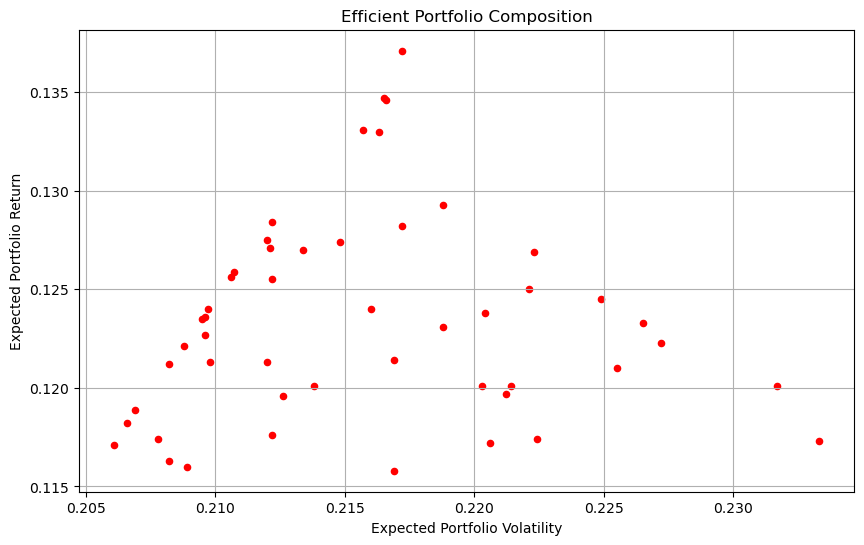

In [21]:
efficient_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="red",
    figsize=(10,6)
)
plt.grid(True)
plt.title("Efficient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
#plt.xlim(.05,.25)
#plt.ylim(-.1, .25)


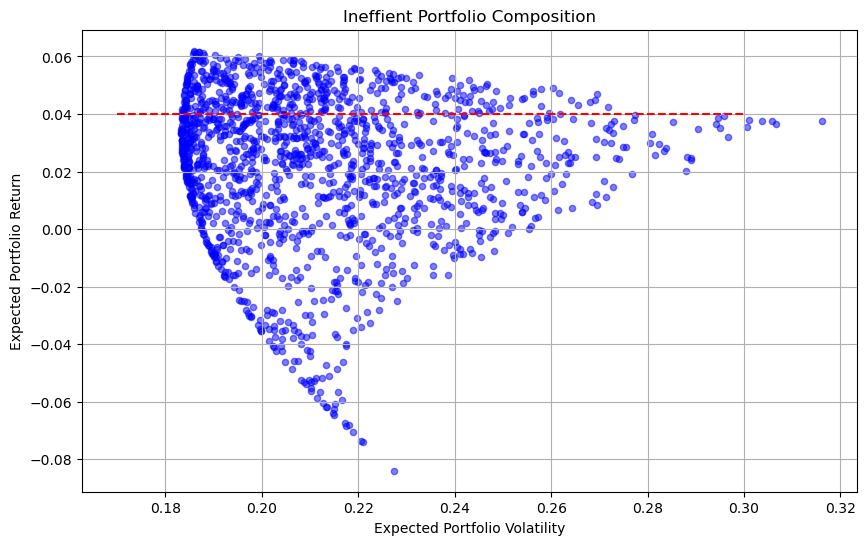

In [25]:
remaining_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="blue",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.04, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.05,.50)
#plt.ylim(-.1, .25)

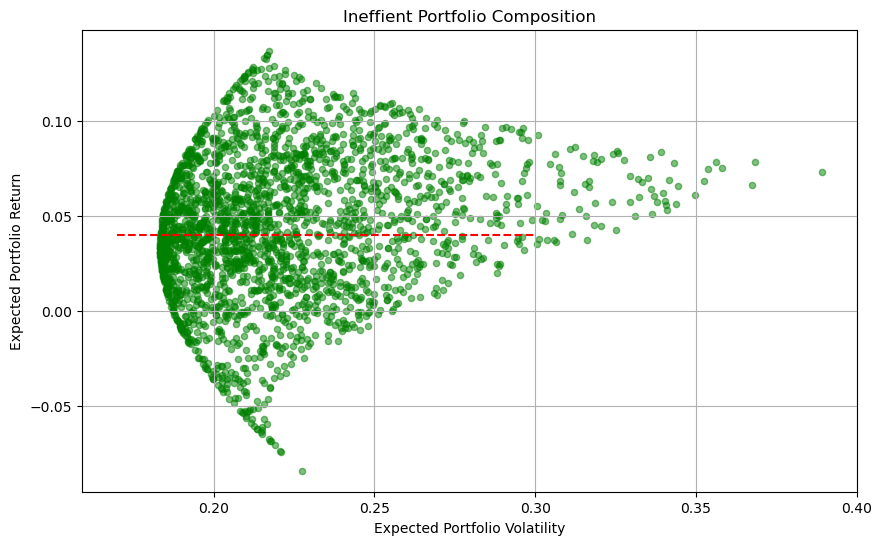

In [24]:
all_pfolios.plot(
    x="VOL",
    y="RTN",
    kind="scatter",
    color="green",
    alpha=.5,
    figsize=(10,6)
)
plt.grid(True)
plt.title("Ineffient Portfolio Composition")
plt.xlabel("Expected Portfolio Volatility")
plt.ylabel("Expected Portfolio Return")
plt.hlines(.04, .17, .3, linestyle="dashed", colors="red")
#plt.xlim(.15,.30)
#plt.ylim(-.1, .5)